In [1]:
## 1-1
import pandas as pd
# 데이터 분석 및 전처리
import numpy as np
# 숫자처리
import matplotlib.pyplot as plt
# 데이터 시각화
from sklearn.neighbors import KNeighborsRegressor
                                #knn
from sklearn.linear_model import LinearRegression
                            ## ML 알고리즘
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error, r2_score
                            ## 성능평가 모듈
from sklearn.model_selection import train_test_split
                            ## 데이터셋 분리 관련 모듈
                            ## 학습/검증/테스트 
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
                            ## 정규화, 컬럼추가
                            
import RegressionModule as rem

In [2]:
mpgDF = pd.DataFrame(pd.read_csv('../data/auto_mpg.csv'))
mpgDF['horsepower'] = mpgDF['horsepower'].replace('?', 'nan')
mpgDF = mpgDF.ffill()


In [3]:
mpgDF.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8.0,307.0,130,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8.0,350.0,165,3693.0,11.5,70,1,buick skylark 320
2,18.0,8.0,318.0,150,3436.0,11.0,70,1,plymouth satellite
3,16.0,8.0,304.0,150,3433.0,12.0,70,1,amc rebel sst
4,17.0,8.0,302.0,140,3449.0,10.5,70,1,ford torino


In [4]:
mpgDF['horsepower'] = mpgDF['horsepower'].astype(float)
mpgDF = mpgDF.ffill()
mpgDF.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [5]:
mpgDF.isna().sum()
mpgDF['weight']=mpgDF['weight'].ffill()

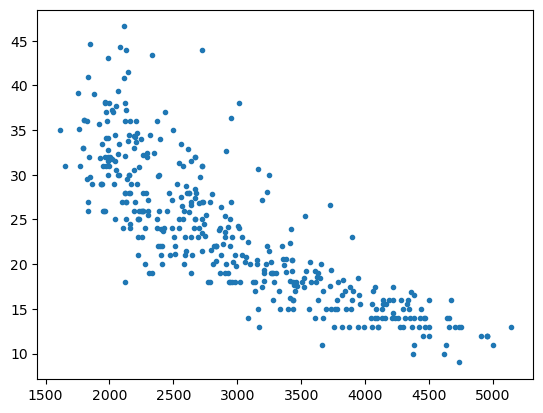

In [6]:
plt.plot(mpgDF['weight'],mpgDF['mpg'], '.')

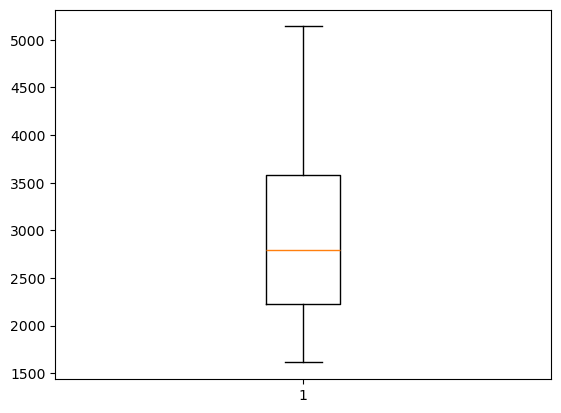

In [7]:
# basic plot
plt.boxplot(mpgDF['weight'])
plt.show()

mpg와 연관성 있는 데이터.
- cylinder, displacement, horsepower, weight
- weight만.

In [8]:
# feature = mpgDF[['horsepower', 'displacement','weight']]
# feature = mpgDF[['displacement','weight']]



In [9]:
from RegressionModule import RegressionModule as rm

In [10]:
feature = mpgDF[['weight']]
target = mpgDF['mpg']
lr_test = rm()
X_train, X_test, y_train, y_test = lr_test.train_test_cut(feature,target)
# X_train, X_test, y_train, y_test = lr_test.polyFeature(X_train, X_test, y_train, y_test)
abc = lr_test.lr(X_train, X_test, y_train, y_test)
abc

X_train => 2D (303, 1) / X_test => 2D, (101, 1)
y_train => 1D (303,), / y_test => 1D, (101,)
(303, 1) 2 D / 303


,train_score,test_score,diff,train_loss,test_loss,coef,intercept
RegressionModule,0.137521,0.137521,0.0,0.844752,0.844752,[-0.0075],45.504529


In [ ]:
print( "min :", X_train.min(axis=0)[1], "max :", X_train.max(axis=0)[1] )
min_x, max_x = X_train.min(axis=0)[1], X_train.max(axis=0)[1]
# minmax 해서 0~1
## - 곡선 회귀식에 대입할 데이터 
x=np.linspace(min_x, max_x)  # 1<= ~ <=42 범위에서 균등하게 50개[기본값] 데이터 생성 
print('shape :' , x.shape)
# print(x)

min : 1613.0 max : 5140.0
shape : (50,)


In [ ]:
# print(pd.DataFrame(abc))
abc

(                  train_score  test_score  diff  train_loss  test_loss  \
 RegressionModule     0.140712    0.140712   0.0    0.822896   0.822896   
 
                                  coef  intercept  
 RegressionModule  [0.0, -0.0165, 0.0]  58.924776  ,
 LinearRegression())

In [ ]:
y = abc.loc['RegressionModule', 'coef'][1]*x+abc.loc['RegressionModule', 'intercept']
plt.plot(x, y, '.b-')
plt.show()

AttributeError: 'tuple' object has no attribute 'loc'

In [ ]:
feature = mpgDF[['displacement','horsepower', 'weight']]
target = mpgDF['mpg']

from sklearn.preprocessing import StandardScaler
array = feature.to_numpy()
scaler = StandardScaler()
feature = scaler.fit_transform(array)

lr_test = rm()
X_train, X_test, y_train, y_test = lr_test.train_test_cut(feature,target)
X_train, X_test, y_train, y_test = lr_test.polyFeature(X_train, X_test, y_train, y_test,interactionTF=True)
abc = lr_test.lr(X_train, X_test, y_train, y_test)
abc

X_train => 2D (303, 3) / X_test => 2D, (101, 3)
y_train => 1D (303,), / y_test => 1D, (101,)
X_train => 2D (303, 7) / X_test => 2D, (101, 7)
y_train => 1D (303,), / y_test => 1D, (101,)
(303, 7) 2 D / 303


(                  train_score  test_score  diff  train_loss  test_loss  \
 RegressionModule     0.150679    0.150679   0.0    0.750548   0.750548   
 
                                                                coef  intercept  
 RegressionModule  [0.0, -2.438, -3.6172, -2.1644, 1.6276, 0.5889...  21.598571  ,
 LinearRegression())

In [ ]:
list(abc['coef'])

TypeError: tuple indices must be integers or slices, not str

In [ ]:
feature = mpgDF[[ 'displacement','horsepower', 'weight']]
target = mpgDF['mpg']

from sklearn.preprocessing import StandardScaler
array = feature.to_numpy()
scaler = StandardScaler()
feature = scaler.fit_transform(array)

lr_test = rm()
X_train, X_test, y_train, y_test = lr_test.train_test_cut(feature,target)
X_train, X_test, y_train, y_test = lr_test.polyFeature(X_train, X_test, y_train, y_test)
model, abc = lr_test.lr(X_train, X_test, y_train, y_test)
abc

X_train => 2D (303, 3) / X_test => 2D, (101, 3)
y_train => 1D (303,), / y_test => 1D, (101,)
X_train => 2D (303, 10) / X_test => 2D, (101, 10)
y_train => 1D (303,), / y_test => 1D, (101,)
(303, 10) 2 D / 303


LinearRegression()

In [ ]:
list(abc['coef'])

TypeError: 'LinearRegression' object is not subscriptable

In [ ]:
print( "min :", X_train.min(axis=1)[1], "max :", X_train.max(axis=1)[1] )
min_x, max_x = X_train.min(axis=1)[1], X_train.max(axis=1)[1]
# minmax 해서 0~1
## - 곡선 회귀식에 대입할 데이터 
x1=np.linspace(min_x, max_x)  # 1<= ~ <=42 범위에서 균등하게 50개[기본값] 데이터 생성 
print('shape :' , x.shape)
# print(x)

min : -0.10290961718427463 max : 1.0
shape : (50,)


In [ ]:
print( "min :", X_train.min(axis=1)[2], "max :", X_train.max(axis=1)[2] )
min_x, max_x = X_train.min(axis=1)[2], X_train.max(axis=1)[2]
# minmax 해서 0~1
## - 곡선 회귀식에 대입할 데이터 
x2=np.linspace(min_x, max_x)  # 1<= ~ <=42 범위에서 균등하게 50개[기본값] 데이터 생성 
print('shape :' , x.shape)
# print(x)

min : 0.02561918105516052 max : 1.6939462177646727
shape : (50,)


In [ ]:
type(abc[0])

TypeError: 'LinearRegression' object is not subscriptable

In [ ]:
# y = abc.loc['RegressionModule','coef'][0]*1 + abc.loc['RegressionModule','coef'][1]*x  + abc.loc['RegressionModule','intercept']
y = abc[0].loc['RegressionModule','coef'][0]*1 + abc[0].loc['RegressionModule','coef'][1]*x + abc[0].loc['RegressionModule','coef'][2]*(x**2) + abc[0].loc['RegressionModule','intercept']
# + abc.loc['RegressionModule','coef'][2]*(x**2)

TypeError: 'LinearRegression' object is not subscriptable

In [ ]:
# y1 = abc.loc['RegressionModule', 'coef'][1]*x+abc.loc['RegressionModule', 'intercept']
y2 = abc.loc['RegressionModule', 'coef'][1]*x+abc.loc['RegressionModule', 'intercept']

# plt.plot(x1, y1, '.b-')
plt.plot(x2, y2, '.b-')
plt.plot(x, y, '.b-')
plt.show()

AttributeError: 'LinearRegression' object has no attribute 'loc'

In [ ]:
feature = mpgDF[['displacement','horsepower', 'weight']]
target = mpgDF['mpg']

from sklearn.preprocessing import StandardScaler
array = feature.to_numpy()
scaler = StandardScaler()
feature = scaler.fit_transform(array)

R_test = rm()
X_train, X_test, y_train, y_test = R_test.train_test_cut(feature,target)
# X_train, X_test, y_train, y_test = R_test.polyFeature(X_train, X_test, y_train, y_test)
abc = R_test.RLE('rid')
# abc

X_train => 2D (303, 3) / X_test => 2D, (101, 3)
y_train => 1D (303,), / y_test => 1D, (101,)


NameError: name 'X_train' is not defined

In [ ]:
feature = mpgDF[['displacement','horsepower', 'weight']]
target = mpgDF['mpg']

from sklearn.preprocessing import StandardScaler
array = feature.to_numpy()
scaler = StandardScaler()
feature = scaler.fit_transform(array)

L_test = rm()
X_train, X_test, y_train, y_test = L_test.train_test_cut(feature,target)
# X_train, X_test, y_train, y_test = L_test.polyFeature(X_train, X_test, y_train, y_test)
abc = L_test.RLE(X_train, X_test, y_train, y_test, 'las')
# abc

X_train => 2D (303, 3) / X_test => 2D, (101, 3)
y_train => 1D (303,), / y_test => 1D, (101,)


TypeError: RLE() takes from 1 to 2 positional arguments but 6 were given

In [ ]:
feature = mpgDF[['weight']]
target = mpgDF['mpg']

from sklearn.preprocessing import StandardScaler
array = feature.to_numpy()
scaler = StandardScaler()
feature = scaler.fit_transform(array)

E_test = rm()
X_train, X_test, y_train, y_test = E_test.train_test_cut(feature,target)
print(X_train.shape)
X_train, X_test, y_train, y_test = E_test.polyFeature()
print(X_train.shape)
abc = E_test.RLE('ela')
abc

X_train => 2D (303, 1) / X_test => 2D, (101, 1)
y_train => 1D (303,), / y_test => 1D, (101,)
(303, 1)


ValueError: Expected 2D array, got scalar array instead:
array=.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
feature = mpgDF[['displacement','horsepower', 'weight']]
target = mpgDF['mpg']

from sklearn.preprocessing import StandardScaler
array = feature.to_numpy()
scaler = StandardScaler()
feature = scaler.fit_transform(array)

E_test = rm()
X_train, X_test, y_train, y_test = E_test.train_test_cut(feature,target)
print(X_train.shape, type(X_train))
# X_train, X_test, y_train, y_test = E_test.polyFeature(X_train, X_test, y_train, y_test)
print(X_train.shape, type(X_train))
abc = E_test.RLE(X_train, X_test, y_train, y_test, 'ela')
abc

X_train => 2D (303, 3) / X_test => 2D, (101, 3)
y_train => 1D (303,), / y_test => 1D, (101,)
(303, 3) <class 'numpy.ndarray'>
(303, 3) <class 'numpy.ndarray'>


TypeError: RLE() takes from 1 to 2 positional arguments but 6 were given

In [ ]:
R_test.RLE(type='las')

TypeError: RLE() missing 4 required positional arguments: 'X_train', 'X_test', 'y_train', and 'y_test'